<a href="https://colab.research.google.com/github/Mohammed343-a11/Mohammed343-a11/blob/main/brean_tumor_multi-class%20_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing our drive for taking dataset**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
#!rm -rf <folder name>

**extracting our dataset frome drive**

In [3]:
!pip install unrar
!unrar x /content/drive/MyDrive/Untitled_folder/dataset.rar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/drive/MyDrive/Untitled_folder/dataset.rar

Creating    dataset                                                   OK
Creating    dataset/glioma_tumor                                      OK
Extracting  dataset/glioma_tumor/image(1).jpg                              0%  OK 
Extracting  dataset/glioma_tumor/image(10).jpg                             1%  OK 
Extracting  dataset/glioma_tumor/image(11).jpg                             1%  OK 
Extracting  dataset/glioma_tumor/image(12).jpg                             2%  OK 
Extracting  dataset/glioma_tumor/image(13).jpg                             2%  OK 
Extracting  dataset/glioma_tumor/image(14).jpg                             3%  OK 
Extracting  dataset/glioma_tumor/image(15).jpg             

**importing some useful library**

In [4]:
# Importing the necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import keras.utils as image
from keras.applications.resnet_v2 import preprocess_input
from keras.models import load_model
import matplotlib.pyplot as plt


**Installing split folder for traning testing and vadkidating data**

In [5]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**for trainig 80% ,for testing 20%, for validating,10 %**

In [6]:
import splitfolders
splitfolders.ratio("../content/dataset", output="output",  ratio=(.8,0.1,0.1)) 

Copying files: 200 files [00:00, 6330.07 files/s]


**Spesify our data folder**


In [7]:
# Specifying the data directory and image dimensions
train_data_dir = '/content/output/train'
validation_data_dir = '/content/output/val'
test_data_dir = '/content/output/test'
img_width, img_height = 224, 224

**preprocess the datas using imagdatagenerator function and apply data augmentation for traing set**

In [8]:
# Defining the data generators for training and validation sets
train_datagen = ImageDataGenerator(
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    rescale=1./255,
    rotation_range=90)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='categorical')


Found 160 images belonging to 4 classes.
Found 20 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


**DATA Augmentation Example**

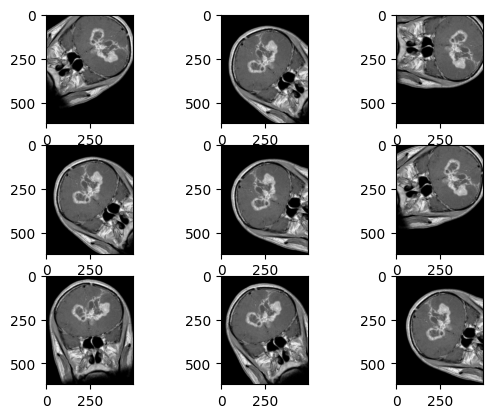

In [9]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('/content/dataset/glioma_tumor/image(1).jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # generate batch of images
 batch = it.next()
 # convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure
pyplot.show()

**specify the length of the dataset in each splited folder within sub directory**

In [10]:
import os
list = os.listdir("/content/output/train/glioma_tumor") + os.listdir("/content/output/train/meningioma_tumor") + os.listdir("/content/output/train/no_tumor")  + os.listdir("/content/output/train/pituitary_tumor")# dir is your directory path
Total_Traindata = len(list)

list = os.listdir("/content/output/val/glioma_tumor") + os.listdir("/content/output/val/meningioma_tumor") + os.listdir("/content/output/val/no_tumor")  + os.listdir("/content/output/val/pituitary_tumor")# dir is your directory path
Total_Valdata = len(list)

list = os.listdir("/content/output/test/glioma_tumor") + os.listdir("/content/output/test/meningioma_tumor") + os.listdir("/content/output/test/no_tumor")  + os.listdir("/content/output/test/pituitary_tumor")# dir is your directory path
Total_Testdata = len(list)

print (Total_Traindata)
print (Total_Valdata)
print (Total_Testdata)

160
20
20


In [11]:
labels = []
for i in os.listdir("/content/dataset"):
    labels+=[i]

In [12]:
labels

['pituitary_tumor', 'glioma_tumor', 'meningioma_tumor', 'no_tumor']

In [13]:
import random
import matplotlib.image as mpimg
def load_random_imgs_from_folder(folder,label):
  plt.figure(figsize=(15,15))
  for i in range(4):
    file = random.choice(os.listdir(folder))
    image_path = os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,4,i+1)
    ax.title.set_text(label)
    plt.xlabel(f'Name: {file}')
    plt.imshow(img)

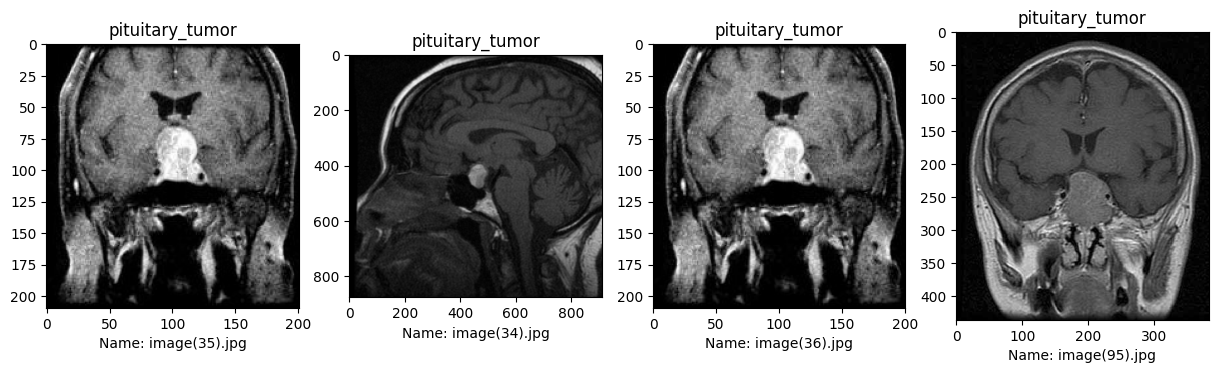

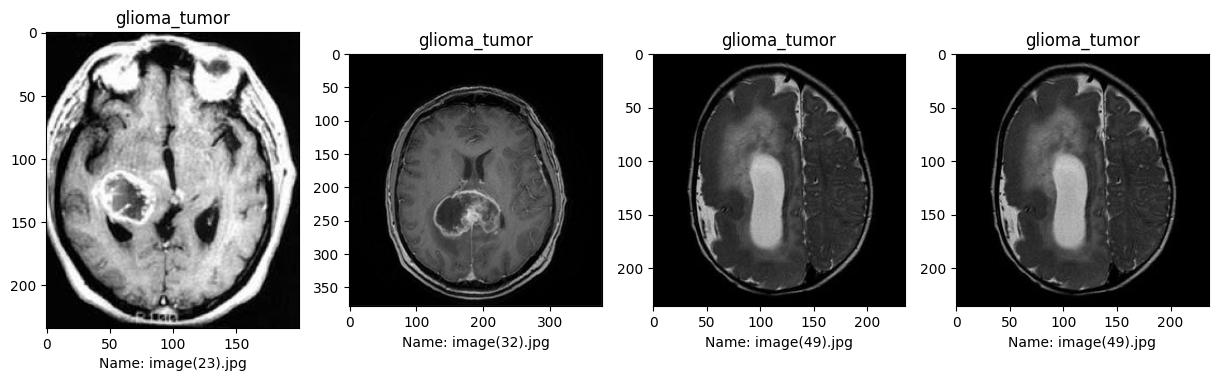

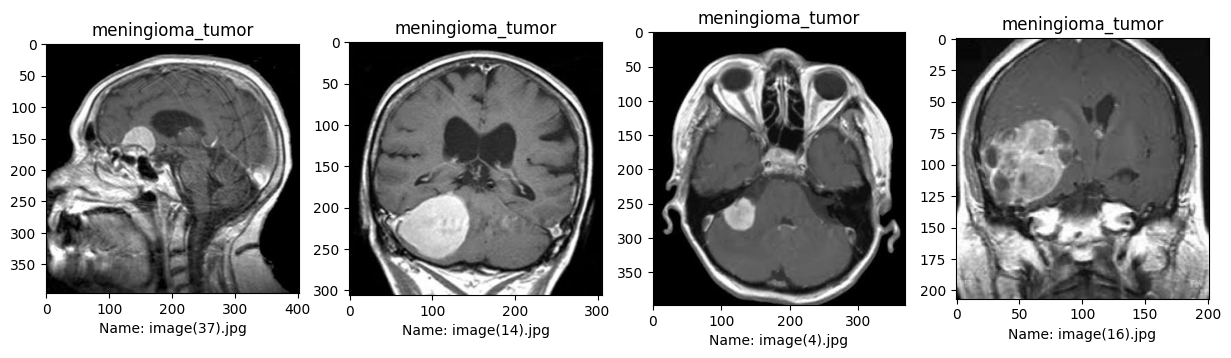

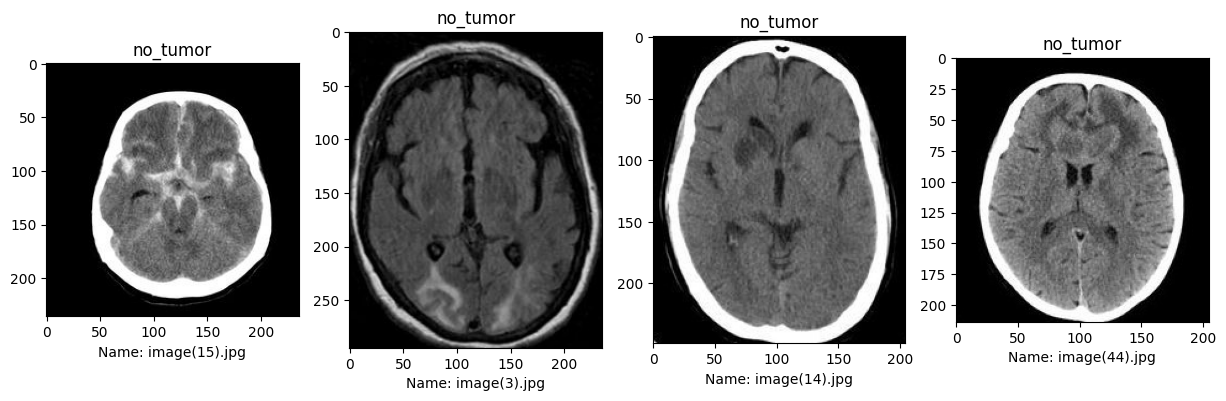

In [14]:
data_dir = "../content/dataset"
for label in labels:
    load_random_imgs_from_folder(f"{data_dir}/{label}",label)

**Visualize the size of the traning ,validating  and testing data in grapycal manner** 

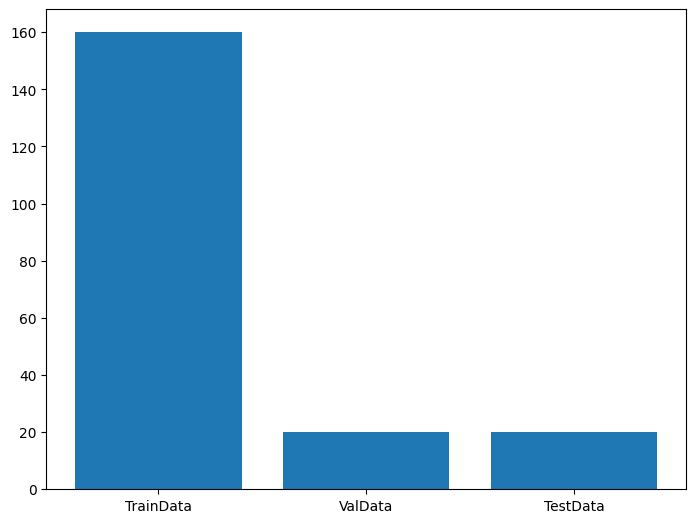

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['TrainData', 'ValData', 'TestData']
Data = [Total_Traindata,Total_Valdata,Total_Testdata ]
ax.bar(langs,Data)
plt.show()

**Creating the CNN model using pre-trained ResNet50V2 architecture**

In [16]:
# Creating the CNN model using pre-trained ResNet50V2 architecture
base_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(img_width, img_height, 3))

base_model.trainable = False

model = models.Sequential([
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(4, activation='softmax')
])

94668760/94668760 [==============================] - 1s 0us/step


 Compiling the model  and show summary of the model


In [17]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 23,696,196
Trainable params: 131,396
Non-trainable params: 23,564,800
______________________________________

**Modify earlystoping and model cheakpoint during training**

In [80]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
#early stoping
er=EarlyStopping(monitor="val_accuracy",min_delta=0.1,patience=20,verbose=1,mode='auto')
#model cheakpoint
mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1,save_best_only=True, mode='auto')
cd=[er,mc]

Train the model by fitting with our traning data

In [81]:

# Training the model
history=model.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[mc,er] )


<ipython-input-81-06173158bb85>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/20
5/5 [==============================] - ETA: 0s - loss: 0.2734 - accuracy: 0.8938
Epoch 1: val_accuracy improved from -inf to 0.70000, saving model to ./bestmodel.h5
5/5 [==============================] - 3s 685ms/step - loss: 0.2734 - accuracy: 0.8938 - val_loss: 1.2631 - val_accuracy: 0.7000
Epoch 2/20
5/5 [==============================] - ETA: 0s - loss: 0.2127 - accuracy: 0.9187
Epoch 2: val_accuracy did not improve from 0.70000
5/5 [==============================] - 4s 721ms/step - loss: 0.2127 - accuracy: 0.9187 - val_loss: 1.3469 - val_accuracy: 0.6000
Epoch 3/20
5/5 [==============================] - ETA: 0s - loss: 0.2446 - accuracy: 0.9250
Epoch 3: val_accuracy did not improve from 0.70000
5/5 [==============================] - 2s 481ms/step - loss: 0.2446 - accuracy: 0.9250 - val_loss: 1.3299 - val_accuracy: 0.6500
Epoch 4/20
5/5 [==============================] - ETA: 0s - loss: 0.3103 - accuracy: 0.8875
Epoch 4: val_accuracy did not improve from 0.70000
5/5 [===

Save the best model among all epoch

In [86]:
hist = history.history
hist.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Graphycal representation of our accurecy within training data**

Text(0, 0.5, 'accuracy')

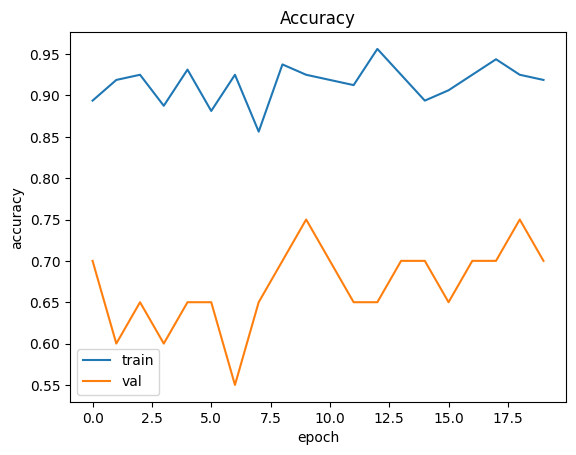

In [87]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy")
plt.legend(["train","val"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

**Graphycal representation of our accurecy within training data**

Text(0, 0.5, 'Loss')

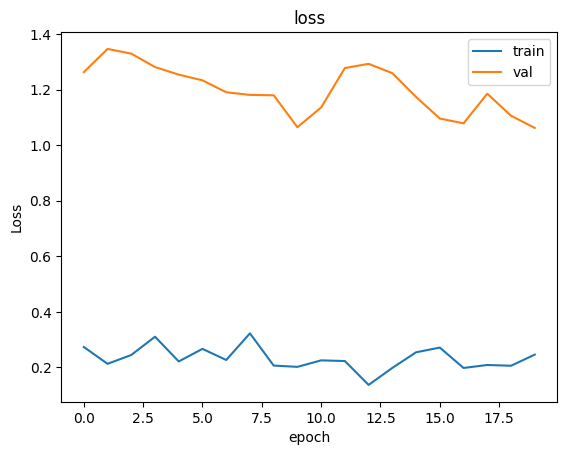

In [88]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("loss")
plt.legend(["train","val"])
plt.xlabel("epoch")
plt.ylabel("Loss")

**evaluate our model with resoect to test (unseen )data**

In [82]:
model.evaluate_generator(test_generator)

<ipython-input-82-faa0e9406f88>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator)


[0.5947750210762024, 0.800000011920929]

In [89]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

# Define the data generators for testing
test_data_dir = "/content/output/test"
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Load the pre-trained ResNet50V2 model
model = load_model("/content/bestmodel.h5")

# Evaluate the model on the testing generator
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
target_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor',"pituitary_tumor"]
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Found 20 images belonging to 4 classes.
1/1 [==============================] - 1s 877ms/step
Classification Report
                  precision    recall  f1-score   support

    glioma_tumor       0.25      0.40      0.31         5
meningioma_tumor       0.00      0.00      0.00         5
        no_tumor       0.50      0.40      0.44         5
 pituitary_tumor       0.20      0.20      0.20         5

        accuracy                           0.25        20
       macro avg       0.24      0.25      0.24        20
    weighted avg       0.24      0.25      0.24        20



Load our saved model

In [90]:
model = load_model('/content/bestmodel.h5')

Find out the name of class with respect to thire lable value 

In [91]:
train_generator.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

Select Any image frome the test data and test the model prediction

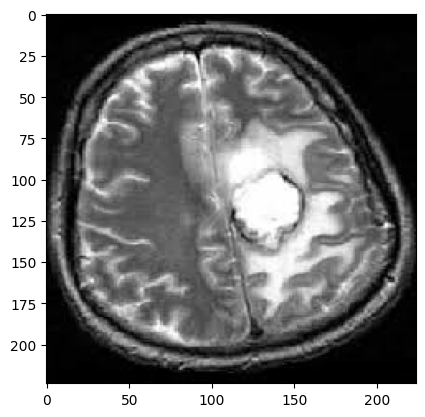

1/1 [==============================] - 1s 1s/step
glioma_tumor: 0.59
meningioma_tumor: 0.23
no_tumor: 0.17
pituitary_tumor: 0.00
1/1 [==============================] - 0s 116ms/step
The predicted class is glioma_tumor


In [92]:
# Load test image
test_image = tf.keras.utils.load_img('/content/output/test/glioma_tumor/image(30).jpg', target_size=(img_width, img_height))
plt.imshow(test_image)
plt.show()
# Preprocess the image
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = preprocess_input(test_image)

# Get predicted probabilities for each class
predictions = model.predict(test_image)

# Print the class labels and their corresponding probabilities
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor','pituitary_tumor'] # Update with actual class labels
for label, probability in zip(class_labels, predictions[0]):
    print(f'{label}: {probability:.2f}')

pred=model.predict(test_image)
output_class=class_labels[np.argmax(pred)]
print("The predicted class is", output_class)

In [ ]:
!pip install streamlit
!pip install scikit-learn

**Deploy our Model **

In [96]:
%%writefile app.py

import streamlit as st
import tensorflow.keras as keras
from PIL import Image, ImageOps
import numpy as np

# load the trained model weights and labels
def load_model():
    model = keras.models.load_model('/content/bestmodel.h5')
    labels = ['Meningioma', 'Glioma', 'Pituitary', 'No tumor']
    return model, labels

# preprocess the input image
def preprocess_image(image):
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)
    image = np.asarray(image)
    image = np.expand_dims(image, axis=0)
    image = image.astype('float32')
    image /= 255.0
    return image

# classify the input image using the loaded model
def predict(image, model):
    classes = model.predict(image)
    return classes[0]

# define the Streamlit app interface
def predict_tumor():
    st.set_option('deprecation.showfileUploaderEncoding', False)
    st.title("Brain Tumor Classifier")
    st.header("Upload your brain MRI scan")
    
    # accept user input image
    file = st.file_uploader("Choose an image in JPG or PNG format", type=["jpg", "jpeg", "png"])
    
    if file is None:
        st.text("Please upload an image file")
        return
    
    image = Image.open(file)
    st.image(image, use_column_width=True)
    
    # preprocess and classify the input image
    processed_image = preprocess_image(image)
    model, labels = load_model()
    prediction = predict(processed_image, model)
    
    # output the predicted class label
    class_label = labels[np.argmax(prediction)]
    st.success("The tumor in this MRI is most likely a " + class_label)

# run the Streamlit app interface
predict_tumor()


Overwriting app.py


In [ ]:
!streamlit run /content/app.py & npx localtunnel --port 8501